## 57 - Blending of two videos

### Alpha Blending

Alpha blending is a curved mix of two tones taking into consideration transparency impacts in computer illustrations. The estimation of alpha in the color code goes from 0.0 to 1.0, where 0.0 addresses a completely transparent tone, and 1.0 addresses a completely dark tone. The estimation of the subsequent color when color Value1 with an alpha value of Alpha is drawn over a foundation of color Value0 is given by:  

### Value = Value0(1.0 - Alpha) + Value1(Alpha)  

The alpha part might be utilized to mix to red, green and blue segments similarly, as in 32-bit RGBA, or, then again, there might be three alpha qualities determined relating to every one of the essential tones for spectral tone shifting.

Now, the second thing we will be using is OpenCV which is a library of programming functions that focuses on real-time computer vision. But, before moving forward we will keep a note of a few things

### Important Points

In order for our program to work perfectly, you've to make sure:

The resolution and frame rate of the two input videos must be exactly same (in code it's using 1920x1080 format so use that only, otherwise you've to set the 'h', 'w' values accordingly with a resolution of your input videos which we will see later in the code)
The code is written, taking into consideration that the background video's duration is slightly greater than or equal to the foreground video's duration, so it's preferable for you as well-to-do the same with your background and foreground input videos otherwise you've to assign the "ret" value to the background instead of foreground which we will see later in the code

Rename your video files with some unique name because sometimes it might cause an error if there are two video files of the same name and the path of the two input video files must be provided accurately as well.
The foreground video must be a combination of some solid color background (preferably black color) and with some movement of the subject on it.

### Methodology
We will be taking two videos as input, one will be our background video and the second one will be our foreground video. The main work is to remove the solid color background of this foreground video so that we're left with the subject only (of foreground video) with its transparent background. After making this change, the foreground video will then be put on the background video, which will give an illusion of a single video with some effect on it but actually, there will be two videos blended together. This magic is done with the help of OpenCV and Python.

### Step-by-step Approach

Import required modules

Add paths and capture both the input videos.

Iterate through each frame of both the videos and blend them together using Alpha Blending.


In [ ]:
import cv2
import numpy as np 

In [ ]:
foreground = cv2.VideoCapture("/Users/alireza/Coding/OpenCV_Learning/OpenCV_Learnings/Videos/v.mp4")
background = cv2.VideoCapture("/Users/alireza/Coding/OpenCV_Learning/OpenCV_Learnings/Videos/z.mp4")

height , witdth = 1080 , 1920

while True:
    ret , foreground = foreground.read()

    _ , background = background.read()

    if ret is not None:
        # creating the alpha mask
        alpha = np.zeros_like(foreground)
        gray = cv2.cvtColor(foreground, cv2.COLOR_BGR2GRAY)
        alpha[:, :, 0] = gray
        alpha[:, :, 1] = gray
        alpha[:, :, 2] = gray

        # converting uint8 to float type
        foreground = foreground.astype(float)
        background = background.astype(float)

        # normalizing the alpha mask inorder 
        # to keep intensity between 0 and 1
        alpha = alpha.astype(float)/255

        # multiplying the foreground 
        # with alpha matte
        foreground = cv2.multiply(alpha, 
                                  foreground)

        # multiplying the background 
        # with (1 - alpha)
        background = cv2.multiply(1.0 - alpha, 
                                  background)


        # adding the masked foreground 
        # and background together
        outImage = cv2.add(foreground, 
                           background)

        # resizing the masked output
        ims = cv2.resize(outImage, (980, 540))

        # showing the masked output video
        cv2.imshow('Blended', ims/255)

        # if the user presses 'q' then the 
        # program breaks from while loop
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    # if the actual video is over then there's 
    # nothing in the foreground array thus 
    # breaking from the while loop
    else:
        break
        
print('Video Blending is done perfectly')

![Screenshot 2025-08-10 at 15.58.05.png](<attachment:Screenshot 2025-08-10 at 15.58.05.png>)
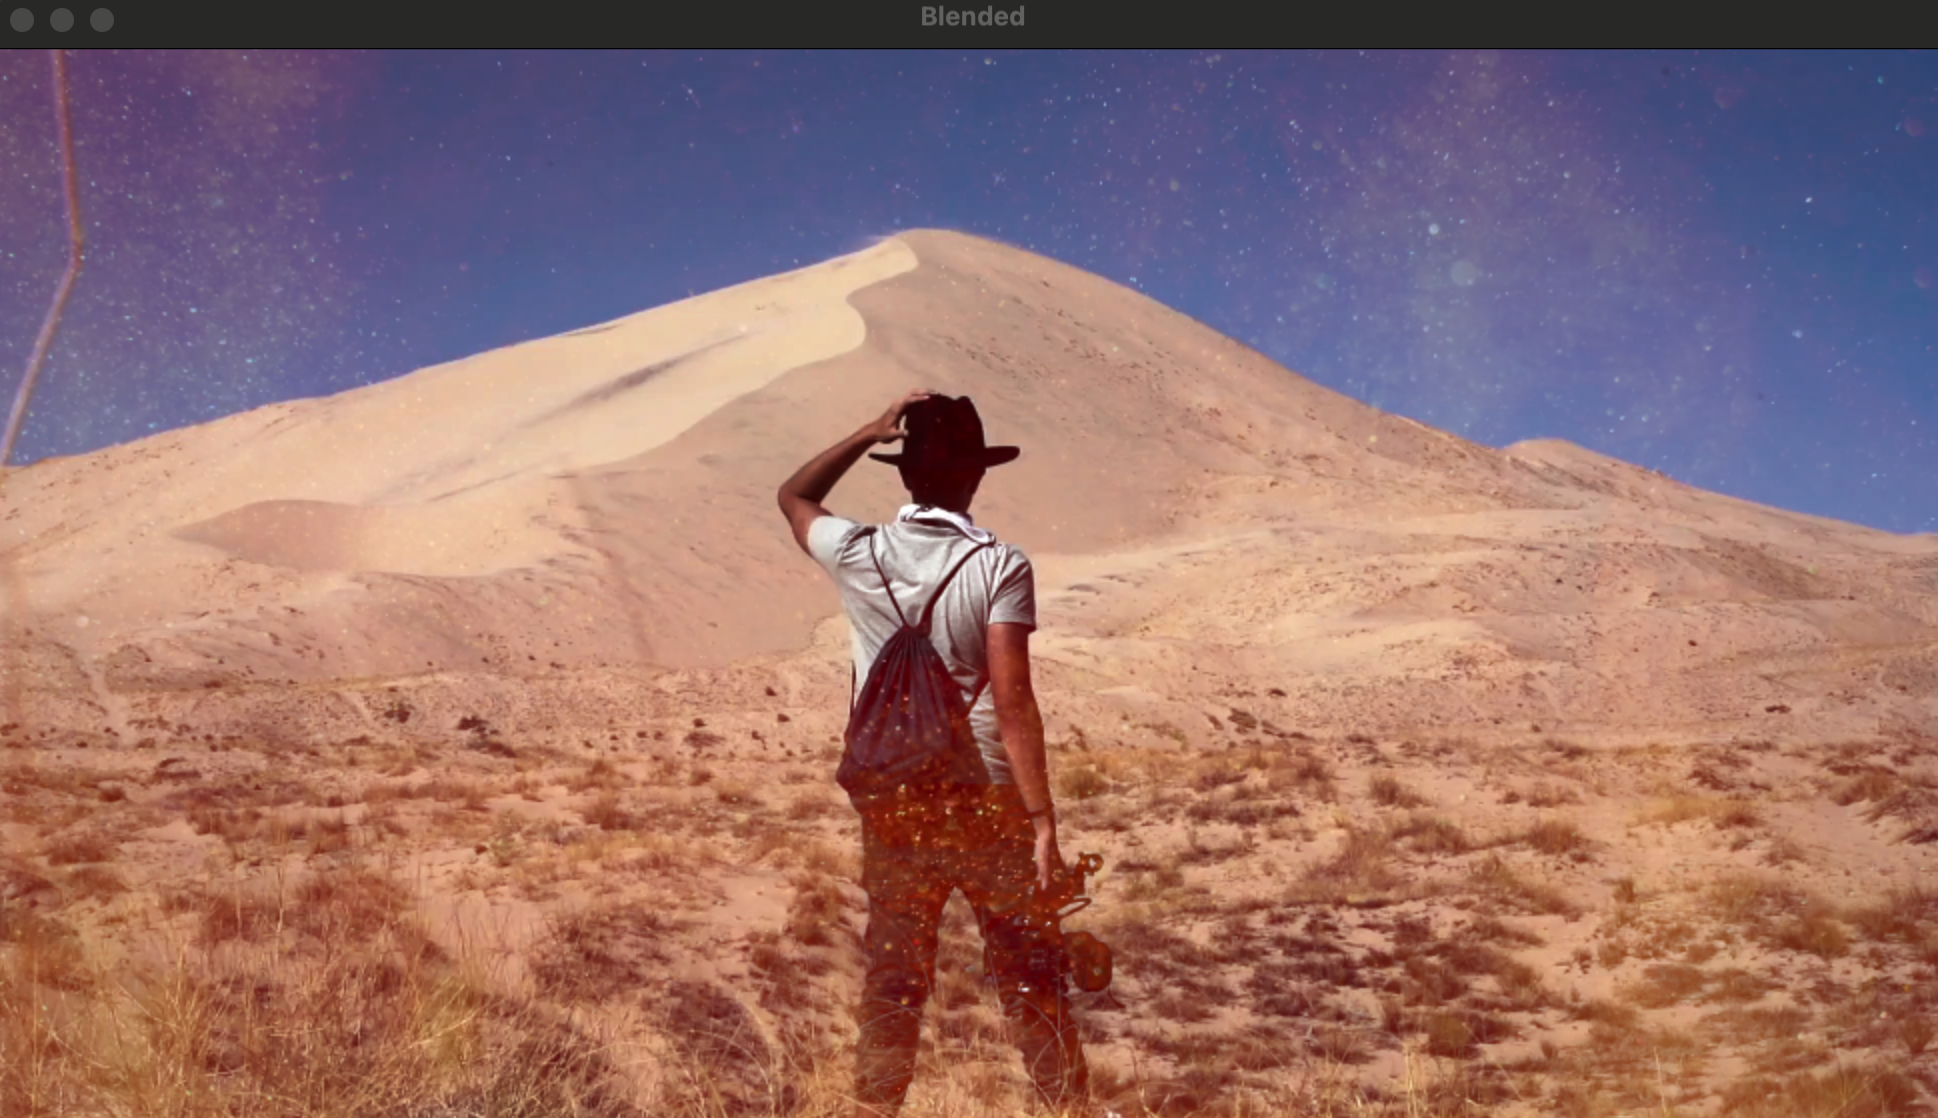

### Source :

https://www.geeksforgeeks.org/python/opencv-python-tutorial/